<a href="https://colab.research.google.com/github/pri2k/Mobile-Computing-Lab/blob/main/Gauss_Markov_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import numpy as np
import matplotlib.pyplot as plt

Using the below formula taken from Geeks from Geeks

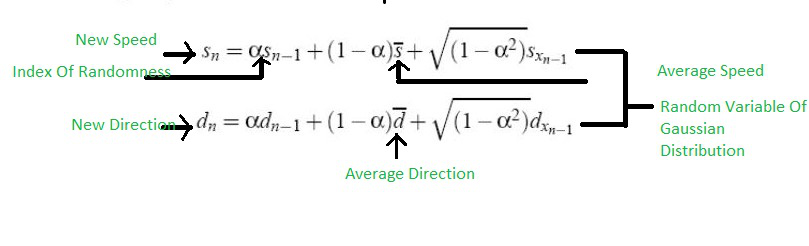

In [78]:
def gauss_markov_mobility(
        steps=100,
        alpha=0.9,         # Index of randomness(0 = random walk, 1 = linear motion)
        mean_speed=1.0,
        mean_angle=np.pi/4,
        variance=1.0,
        start=(0, 0)
    ):

    x = np.zeros(steps)
    y = np.zeros(steps)

    x[0], y[0] = start
    speed = mean_speed
    angle = mean_angle

    for t in range(1, steps):
        speed = alpha * speed + (1 - alpha) * mean_speed + np.sqrt(1 - alpha**2) * np.random.normal(0, np.sqrt(variance))
        angle = alpha * angle + (1 - alpha) * mean_angle + np.sqrt(1 - alpha**2) * np.random.normal(0, np.sqrt(variance))

        x[t] = x[t-1] + speed * np.cos(angle)
        y[t] = y[t-1] + speed * np.sin(angle)

    return x, y

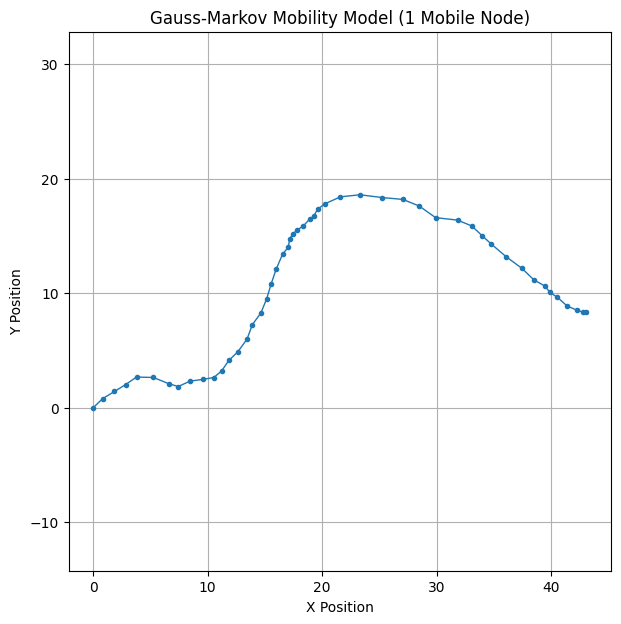

In [83]:
x, y = gauss_markov_mobility(steps=50, mean_angle = np.pi/8, variance = 0.4)

plt.figure(figsize=(7,7))
plt.plot(x, y, marker='o', markersize=3, linewidth=1)
plt.title("Gauss-Markov Mobility Model (1 Mobile Node)")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.grid(True)
plt.axis("equal")
plt.show()

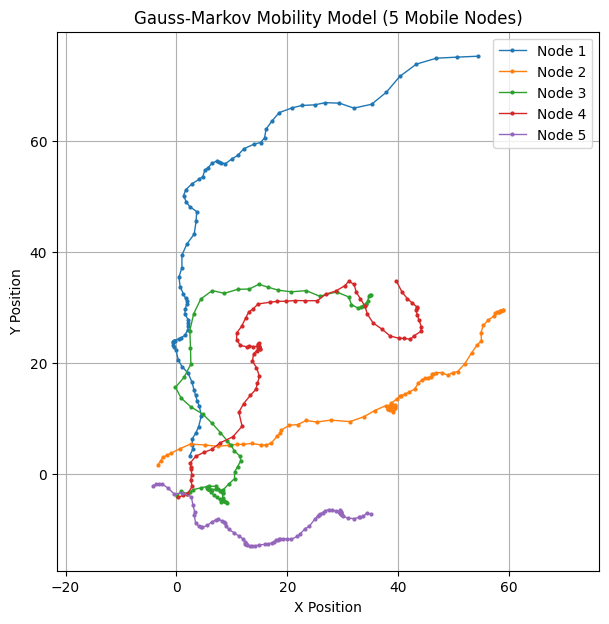

In [80]:
num_steps = 80
num_nodes = 5

plt.figure(figsize=(7,7))

for i in range(num_nodes):
    start_pos = (np.random.uniform(-5, 5), np.random.uniform(-5, 5))
    x, y = gauss_markov_mobility(steps=num_steps, start=start_pos)

    plt.plot(x, y, marker='o', markersize=2, linewidth=1, label=f"Node {i+1}")

plt.title("Gauss-Markov Mobility Model (5 Mobile Nodes)")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.grid(True)
plt.axis("equal")
plt.legend()
plt.show()
